In [158]:
from pyDeepInsight import ImageTransformer, LogScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE
import pandas as pd
import numpy as np

In [159]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only allocate 1GB of memory on the first GPU
  try:
    tf.config.experimental.set_virtual_device_configuration(
        gpus[0],
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=4096)]) # Notice here
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Virtual devices must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPUs


In [160]:
random_state=1515

In [161]:
import librosa
import os
import pandas as pd
import glob
import numpy as np
import soundfile
from sklearn.model_selection import train_test_split

In [5]:
import soundfile
ln = []
for file in glob.glob("D:\\AAA_video_course\\Programming\\dataset\\*\\*.wav"):
         y, sr = librosa.load(file)
         ln.append(librosa.get_duration(y))
 

<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[ 1.5591205e-07 -1.5845627e-07  1.5362870e-07 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[-2.4280996e-06 -1.2362683e-05 -8.5034850e-07 ... -1.0113516e-11
  5.1403621e-12  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[ 2.2051008e-05  1.6838792e-05  3.5639907e-05 ...  4.5767497e-06
 -1.2002213e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[ 2.3406714e-05  3.1186773e-05  4.9467826e-06 ...  1.2180173e-07
 -9.2944845e-08  0

<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[9.6098862e-05 1.6449913e-04 1.1942573e-04 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[-0.00066044 -0.0009837  -0.00090796 ... -0.00171516 -0.0017666
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[ 3.1686827e-04  4.6282235e-04  1.0160641e-04 ... -1.4605960e-05
  6.6572487e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[-7.30260945e-05 -1.18022966e-04 -1.08280736e-04 ...  8.83421380e-05
  4.97258679e-06  0.00000000e+00] as ke

<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[ 1.4367696e-11 -2.6779638e-11  4.5882461e-11 ... -4.3909294e-09
  3.2419845e-09  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -2.5591128e-06
  1.0328043e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  2.5969632e-06
 -2.2879116e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.2620355e-05
 -2.0442327e-05  0

<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -4.8468177e-05
 -3.9741150e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[ 0.000000e+00  0.000000e+00  0.000000e+00 ... -3.228069e-07  3.668273e-07
  0.000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.2222254e-05
  1.6958185e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  3.3059273e-06
 -1.0109745e-06  0.00000

<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[ 1.3289255e-05  5.2349475e-07 -1.6996270e-07 ...  2.1352625e-05
  1.0244334e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[1.3712418e-04 1.1061427e-04 1.5035611e-04 ... 9.4836469e-06 5.6323283e-06
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[-0.00018972 -0.00028815 -0.00023609 ... -0.00022864 -0.00024817
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[ 0.0003336  -0.00096188 -0.0010479  ...  0.0003028   0.00037495
  0.        ] as keyword args. From versio

<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[-7.055801e-07  7.219105e-07 -7.165745e-07 ... -4.086222e-04 -5.412447e-04
  0.000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[-4.1874813e-05 -4.6773665e-05 -3.4686451e-05 ...  3.8415735e-04
  3.4785640e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[ 2.5530628e-05 -5.2173750e-04 -7.5059984e-04 ...  1.6452066e-04
  3.0742216e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[-2.6496826e-08 -7.8331425e-08  2.4941764e-07 ...  1.3340110e-05
  4.5546053e-06  0.00000

<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -2.5576993e-10
 -8.7286324e-11  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[ 9.8418614e-06  7.9208539e-06 -2.5509203e-06 ...  2.5843678e-07
  6.8212209e-08  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[ 0.0000000e+00 -1.1271335e-12  2.5626274e-12 ...  5.8431265e-06
  1.0644371e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.4448483e-06
  2.3235782e-05  0

<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 3.3067558e-05 4.1466599e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  2.6500063e-06
 -1.3668368e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -2.3573888e-05
 -9.4219082e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.2810632e-04
 -1.7050814e-05  0.00000

<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[-2.0307918e-05 -5.2298026e-05 -3.7236270e-05 ...  6.7980865e-05
  5.5757686e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[1.1192961e-05 4.0996697e-06 1.2388755e-05 ... 4.1152991e-05 5.6900539e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[-2.0553965e-05 -4.2396623e-05 -1.0524698e-05 ... -3.0571544e-05
 -2.4053348e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -2.8860572e-07
  2.7953021e-07  0.00000

<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[-2.1317719e-05 -3.5117078e-05 -4.2517961e-05 ... -1.8457296e-05
 -1.6018208e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[-1.13477563e-05 -2.84036541e-05 -1.60181480e-05 ...  1.24570115e-05
  2.62297931e-06  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[-2.0748306e-05 -5.7539492e-05 -5.9851947e-05 ...  9.8314558e-05
  1.2096106e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.2176814e-05 3.6829738e-06
 0

<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[ 2.2089142e-07 -2.5789879e-07  2.9346901e-07 ...  4.9161537e-09
 -4.5238084e-09  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[-6.2164168e-07  6.8378080e-07 -7.4694310e-07 ...  4.0428527e-06
 -2.2174786e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -4.9185683e-06
  1.2401711e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.5361306e-07
  1.1716977e-07  0

<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.9292056e-06
  1.5475589e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[-3.9237580e-06  1.3506251e-05  1.9488196e-05 ... -9.1899838e-06
  4.2024317e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[-1.2910047e-05 -1.4807372e-06  2.4678102e-06 ... -4.1842795e-06
  1.7547159e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[ 3.4013382e-07 -3.4082143e-07  3.2611081e-07 ...  3.2641710e-06
 -2.0297441e-05  0

<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  1.5038186e-06
 -5.9492500e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[-2.1158733e-07  2.8320113e-07 -3.6307932e-07 ...  3.5692223e-09
 -9.7727870e-09  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[-1.3432957e-06  1.2869455e-06 -9.9634451e-07 ...  1.2306461e-06
 -1.2632922e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[ 2.9691892e-05  4.9651033e-05  4.4956159e-05 ... -2.6691730e-06
  1.9062189e-05  0

<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[5.30541583e-05 6.30372961e-05 1.18652504e-04 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  1.2416451e-06
 -8.0814652e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  1.2098075e-05
 -5.5797127e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[ 1.7271600e-07 -2.1852227e-07  2.6624778e-07 ...  5.9923921e-05
  3.7832175e-05  0

<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[1.6304916e-04 2.7735895e-04 2.3304354e-04 ... 8.7455141e-05 9.4507726e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 5.6618712e-05 5.7777026e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[-2.7328886e-07  3.9386404e-07 -5.6552449e-07 ... -5.9072365e-05
 -1.1186601e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[8.4992513e-05 1.5911716e-04 1.3685261e-04 ... 1.7212314e-04 1.9859102e-04
 0.0000000e+00] as k

<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[-1.2549042e-06  1.4857015e-06 -1.7273684e-06 ...  4.9048438e-05
  3.5488694e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[ 5.7471876e-09 -6.5492367e-09  7.1853230e-09 ...  4.6666872e-05
  4.8356014e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[ 1.0789836e-08 -1.6794429e-08  2.3843844e-08 ...  1.0122956e-04
  5.9827351e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[ 7.1752844e-09 -1.3505373e-08  2.1304743e-08 ... -1.1029392e-04
 -1.1100680e-04  0

<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[ 3.6510601e-06 -1.1506663e-05 -6.3714110e-06 ...  1.0472279e-06
 -8.5768795e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[-3.8738037e-08  8.4918071e-08 -1.4003645e-07 ...  4.1309318e-07
 -2.6779594e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[-1.3020692e-06 -1.3838786e-05  1.0554111e-06 ... -9.2463233e-06
 -1.1917565e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[-6.2314198e-09  8.7887058e-09 -1.1732632e-08 ... -4.3531662e-05
 -5.6668632e-05  0

<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[ 7.4558320e-12 -1.0038051e-11  1.1603042e-11 ...  1.6886546e-06
 -1.2335028e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[-4.3082141e-06  1.2529981e-05  3.0404337e-05 ... -3.1054267e-05
 -1.9419362e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[ 4.9329931e-09 -6.7991608e-09  8.9788381e-09 ... -4.6736910e-05
 -7.8511825e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[ 2.2942553e-05  3.0759529e-05  1.4992285e-05 ... -1.2409650e-06
  1.1801317e-06  0

<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[-9.4709121e-06 -3.0865682e-05 -6.7167280e-06 ...  1.5287047e-05
  1.8962566e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[ 6.1715749e-05  1.1246691e-04  8.1567094e-05 ... -9.7345001e-05
 -1.0525828e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[ 1.1452957e-03  8.3272962e-04  8.0774288e-04 ... -3.9377188e-05
 -4.4178785e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[-5.0413611e-05 -6.2961772e-05 -7.2626397e-05 ...  3.2278269e-05
  1.9935156e-05  0

<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[-3.0166329e-05 -7.1153254e-06  5.5835168e-05 ...  5.1621336e-04
  3.9456954e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[ 1.3327051e-05 -1.5031094e-05  4.5022134e-06 ... -1.3874842e-06
  3.4020446e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[ 2.7006170e-05  2.0565899e-06  1.7617247e-05 ... -1.5304558e-04
 -3.3904612e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[ 2.3597473e-05  3.0148161e-05  1.5434660e-05 ... -6.0039115e-06
 -4.8149909e-06  0

<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[8.7551874e-05 1.3283629e-04 8.7496075e-05 ... 1.7464753e-04 2.0036273e-04
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[ 9.8117351e-05  1.5482676e-04  1.1138364e-04 ... -6.4418986e-05
 -7.2761199e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[ 1.1327367e-06 -1.5105284e-06 -2.3219089e-05 ...  1.0550528e-07
 -7.4576548e-08  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[ 7.2697320e-10 -5.0790185e-09  1.0667764e-08 ...  0.0000000e+00
  0.0000000e+00  0.00000

<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[ 5.8336009e-05  8.1488608e-05  4.6898676e-05 ... -7.9365755e-03
 -8.7798024e-03  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[-7.4775933e-05 -1.0801280e-04 -1.0975967e-04 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[ 1.9716546e-05  3.5858535e-05  2.5135058e-05 ... -9.1705306e-06
 -4.7287590e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[-2.5758736e-05 -2.0743963e-05  8.9895576e-07 ...  3.1962606e-09
 -2.4966620e-09  0

<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -2.3606559e-05
 -1.7298906e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[ 3.5872390e-07 -3.4948366e-07  3.2736978e-07 ...  9.7554584e-06
  8.1125090e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[-2.0530371e-05 -1.8721579e-05 -1.2103711e-05 ...  8.3692136e-08
  3.2831704e-08  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[-9.3673907e-06 -9.0358735e-06  5.0561957e-06 ... -2.9288740e-03
 -3.1998151e-03  0

<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[-2.3075631e-06  4.1179592e-06  1.1372854e-05 ...  1.0164315e-07
  1.6212488e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[-3.1724494e-06 -1.1719488e-05 -2.0772800e-06 ...  5.4891323e-05
  1.5870124e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[-4.4349719e-05 -6.5076536e-05 -5.9776077e-05 ...  3.4865894e-04
  3.7115387e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[-5.8426456e-05 -1.3405834e-04 -8.5473759e-05 ... -5.4671989e-07
  7.5351073e-07  0

<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[ 2.3483196e-07 -5.2081532e-07  1.0957382e-06 ...  4.9397289e-07
 -4.3327762e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 3.1948890e-05 3.1124273e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[ 1.0066479e-06 -2.2553641e-06  1.1619502e-05 ... -2.9037794e-06
 -1.6497635e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[1.9960309e-05 5.9066420e-05 5.7197551e-05 ... 2.3839259e-05 3.4970923e-05
 0.0000000e+00

<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.7606229e-06
  9.3048093e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[-6.6270601e-08  8.4378335e-08 -1.0338525e-07 ... -4.1826129e-06
 -1.9485604e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[-8.9603941e-10  5.9298444e-10 -5.9942516e-11 ...  1.0570508e-05
  9.1161228e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[-2.2371403e-05 -2.5428562e-05 -1.7876682e-05 ... -1.0627457e-05
  2.8032225e-06  0

<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -5.0822615e-07
  5.3469915e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  2.9384796e-06
 -1.2277619e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[ 1.4434094e-08 -1.4879554e-08  1.4409941e-08 ... -1.1429979e-06
  9.8054340e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[ 0.000000e+00  0.000000e+00  0.000000e+00 ... -7.598597e-10  6.496509e-10
  0.0000

<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -2.5849986e-06
  1.4160548e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  3.4373084e-11
 -2.9047773e-10  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -2.4344936e-07
  2.4371670e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  2.6415316e-08
 -2.6053533e-08  0

<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[ 8.76454797e-05  1.17060270e-04  1.18172036e-04 ... -3.82361833e-07
  3.82345746e-07  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[-4.5276276e-05 -6.3295192e-05 -4.3999102e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[ 3.2897549e-06 -1.1800576e-05 -4.5681700e-06 ...  4.2577001e-04
  4.2698174e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[-7.89505066e-05 -1.22543192e-04 -1.21723264e-04 ... -2.86403792e-05
 -9.6294

<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[-8.8526795e-05 -1.3116551e-04 -1.1747758e-04 ...  1.1410184e-12
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[-2.5204428e-05 -5.7232461e-05 -4.3185795e-05 ... -4.0827126e-05
 -3.4375866e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[-2.2846420e-05 -3.1924927e-05 -4.6657715e-06 ...  2.1191550e-04
  2.1471325e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[7.7110377e-07 2.1744701e-05 3.6003352e-05 ... 9.1782313e-05 9.6777600e-05
 0.00000

<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 6.8676131e-09 4.9077755e-09
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  4.6312916e-08
 -2.7663509e-08  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  7.9907545e-07
 -6.1902301e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.8617331e-06
  2.2478548e-06  0.00000

<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.1003667e-05
  5.3526005e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -2.9869720e-06
  6.6106177e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  2.0793420e-06
 -1.5932054e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  1.1413482e-05
 -3.1332556e-06  0

<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[-9.6087097e-05 -1.6424945e-04 -1.7387563e-04 ...  5.2666529e-08
  3.4280117e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[1.7057420e-05 6.5969303e-05 1.1386452e-04 ... 6.2320069e-05 6.6577115e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[ 1.5608661e-07 -1.6863905e-07  1.7626513e-07 ...  1.7507411e-04
  1.9707772e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[ 1.2219600e-04  1.8301723e-04  7.5676006e-05 ...  6.9540089e-05
 -1.4510023e-06  0.00000

<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[ 2.0796448e-04  7.1032679e-05 -4.0834735e-04 ...  4.9979036e-07
 -4.6453303e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[ 7.5675867e-05  2.9423002e-06 -7.5285956e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[-7.0581031e-08 -2.5548841e-08  1.6240570e-07 ...  1.5991445e-04
  1.7141545e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[-9.86161540e-05 -1.43113139e-04 -1.23108897e-04 ... -1.17019945e-05
 -1.96354576e-

<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[ 3.3738947e-06 -1.1625637e-05 -5.5755108e-06 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[ 7.2793526e-08 -8.4489663e-08  9.5075265e-08 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[ 0.000000e+00  0.000000e+00  0.000000e+00 ... -1.120615e-08  9.216074e-09
  0.000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.8863416e-07
  2.0480346e-07  0.00000

<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[-8.4423518e-05 -1.3755064e-04 -1.2536581e-04 ...  3.7211939e-05
  6.5009452e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[-8.26839219e-09  1.20862325e-08 -1.65397065e-08 ... -3.62946162e-06
  2.10118401e-06  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[2.2582019e-05 5.4481989e-05 6.6380569e-05 ... 4.4649438e-05 3.1101139e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[ 8.5872991e-05  1.4213161e-04  1.2306556e-04 ... -1.9948038e-05
 -2.6782731e-05  0

<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[-2.3102290e-05 -2.2669916e-05  2.4835879e-06 ...  7.0532114e-04
  1.1964062e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[-1.0730016e-05 -2.8991521e-05 -1.6713213e-05 ... -8.6932466e-04
 -8.3115464e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[3.7321799e-06 9.4091265e-06 4.9421375e-05 ... 1.6815208e-04 1.8788430e-04
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[ 1.31881825e-05  1.77687270e-05  1.00401039e-05 ... -2.14505235e-05
 -6.07082911e-05  0.

<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[-4.1272098e-05  6.9821850e-05 -5.0989194e-05 ... -1.1316306e-05
  2.3660355e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[-9.510573e-06 -8.250108e-06  2.862567e-06 ...  3.487507e-05 -7.456424e-06
  0.000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[ 0.000000e+00  0.000000e+00  0.000000e+00 ... -6.050419e-05 -6.646725e-05
  0.000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[ 2.34093259e-05  7.03531578e-06 -2.02446045e-05 ... -1.25644465e-05
 -4.49606023e-06  0.000000

<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[-2.9085053e-05 -3.5525845e-05 -4.5290883e-05 ...  2.3470013e-09
 -1.7365369e-09  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[ 3.1435247e-05  4.7846828e-05  2.1238027e-05 ... -9.1392096e-08
  8.7375255e-08  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[-8.2854876e-07  1.1492144e-06 -1.6712411e-06 ...  6.3876464e-06
  2.3292690e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.6725274e-07
  1.4981065e-07  0

<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[ 3.3204423e-10 -2.0284943e-10 -2.5343106e-11 ...  6.7234453e-07
 -1.7770944e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -8.3917925e-08
  8.1797019e-08  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[-2.5108138e-08 -1.3880995e-07  3.6754858e-07 ...  1.1128735e-05
  1.1167944e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[ 1.32847481e-05  7.40702490e-07 -7.26956841e-07 ...  1.02708145e-05
 -3.37682104e-

<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[ 6.3413241e-10 -7.3509704e-10  8.0391360e-10 ... -5.0816606e-10
  3.2588915e-10  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[ 1.4001510e-11 -2.5940250e-11  4.4368297e-11 ... -7.1115657e-08
  6.7715959e-08  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[ 1.0047965e-12 -2.2256752e-12  5.2551882e-12 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.4009749e-05
 -4.2975021e-06  0

<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[ 2.7199268e-10 -6.4912709e-10  1.1768364e-09 ...  1.3892484e-05
 -1.6575007e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[-3.63708250e-06 -1.09284865e-05 -3.52434699e-06 ... -1.52439952e-07
  1.49574589e-07  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[ 1.5208038e-05  1.3895911e-05 -1.0352610e-06 ... -2.6836717e-06
  1.0488441e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[-2.7117454e-05 -1.9094317e-05 -1.4395607e-06 ...  0.0000000e+00
  0.0000000e

<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[ 1.0790005e-06 -2.3121934e-06  1.1653963e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  3.9338434e-07
 -3.9294406e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[ 2.3979785e-06  1.3482580e-05  1.6306438e-05 ...  1.2915508e-05
 -7.6465773e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -5.1574857e-06
 -1.8905757e-06  0

<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[ 1.6910027e-06 -2.9080770e-06  1.2289214e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  4.7882605e-08
 -9.5278963e-08  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  1.0753123e-06
 -1.1219612e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -2.1954007e-05
 -1.0795411e-06  0

<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0485890e-05 6.8127506e-06
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -5.6968645e-07
 -1.3281239e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -6.6792068e-06
  1.5019585e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))
<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -8.9996865e-06
  5.8855454e-07  0.00000

<ipython-input-5-4a324a994ec8>:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.00012568 0.00013477 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ln.append(librosa.get_duration(y))


In [13]:
sr

22050

In [19]:
min(ln)*22050

64745.0

In [20]:
min((ln)*22050)

2.936281179138322

In [21]:
min(ln)

2.936281179138322

In [23]:
max(ln)*22050

116247.0

In [24]:
max(ln)*22050 - min(ln)*22050

51502.0

In [79]:
check = np.arange(2,7)
check
#librosa.util.fix_length(check, size=10)
librosa.util.pad_center(check, size=5, mode='constant')

array([2, 3, 4, 5, 6])

In [162]:
def dataset(file_name):
   # with soundfile.SoundFile(file_name) as sound_file:
       # X = sound_file.read(dtype="float32", start = 0, stop = )
        XX,sr= librosa.load(file_name)    
        X = librosa.util.pad_center(XX, size=116247, mode='constant') 
        result=np.array([])     
        result=np.hstack(X)
        return result

In [69]:
file = "D:\\AAA_video_course\\Programming\\dataset\\Actor_01\\03-01-01-01-01-01-01.wav"
X,sr= librosa.load(file)    
X = librosa.util.pad_center(X, size=116247, mode='constant')

In [42]:
n = "03-01-01-01-01-01-01.wav"
nn = n.split("-")[2]
nn

'01'

In [163]:
#Load the data and SAVE IT FOR each sound file
x,y=[],[]
for file in glob.glob("D:\\AAA_video_course\\Programming\\dataset\\*\\*.wav"):
    emotion = file.split("-")[2]
    if emotion == '03':
        e = 'pos'        #happy
        y.append(e)
        D=dataset(file)
        x.append(D)
    elif emotion == '04':
        e = 'neg'
        y.append(e)     #sad
        D=dataset(file)
        x.append(D)
    elif emotion == '06':
        e = 'neg'
        y.append(e)     #sad
        D=dataset(file)
        x.append(D)
    elif emotion == '08':
        e = 'pos'
        y.append(e)      #surprised
        D=dataset(file)
        x.append(D)
    elif emotion == '07':
        e = 'neg'       #disgust
        y.append(e)
        D=dataset(file)
        x.append(D)
    else:
        continue 

In [164]:
data = pd.DataFrame(y, columns =['emo'])
data

,emo
0,pos
1,pos
2,pos
3,pos
4,pos
...,...
955,pos
956,pos
957,pos
958,pos


In [169]:
data.groupby('emo').size()

emo
neg    576
pos    384
dtype: int64

In [170]:
data = pd.DataFrame(x)
data['labels'] = y
data

,0,1,2,3,4,5,6,7,8,9,...,116238,116239,116240,116241,116242,116243,116244,116245,116246,labels
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,pos
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,pos
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,pos
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,pos
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,pos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,pos
956,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,pos
957,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,pos
958,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,pos


In [ ]:
#save data

In [171]:
y = data['labels'].values
X = data.iloc[:, :-1].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=23, stratify=y)

In [172]:
ln = LogScaler()
X_train_norm = ln.fit_transform(X_train)
X_test_norm = ln.transform(X_test)

In [173]:
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)
num_classes = np.unique(y_train_enc).size

In [174]:
num_classes

2

In [175]:
check = pd.DataFrame(y_train)
check['encoded'] = y_train_enc
check

,0,encoded
0,neg,0
1,neg,0
2,neg,0
3,neg,0
4,pos,1
...,...,...
763,pos,1
764,neg,0
765,neg,0
766,neg,0


In [176]:
distance_metric = 'cosine'
reducer = TSNE(
    n_components=2,
    metric=distance_metric,
    square_distances=True,
    n_jobs=-1
)

In [177]:
pixel_size = (128,128)     #227
it = ImageTransformer(
    feature_extractor=reducer, 
    pixels=pixel_size)

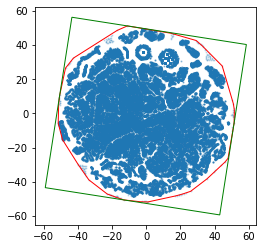

In [178]:
it.fit(X_train, y=y_train, plot=True)
X_train_img = it.transform(X_train_norm)
X_test_img = it.transform(X_test_norm)

In [180]:
import pickle
with open('rav_xtrain.pickle', 'wb') as f:
    pickle.dump(X_train_img, f)
with open('rav_xtest.pickle', 'wb') as f:
    pickle.dump(X_test_img, f)    

In [181]:
import matplotlib.pyplot as plt
X_train_img[0].shape

(128, 128, 3)

In [182]:
from PIL import Image as im
import numpy as np
im = im.fromarray((X_train_img[0]* 255).astype(np.uint8))
image = np.array(im)
print(im.mode) 

RGB


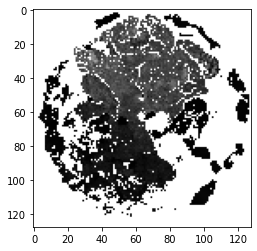

In [183]:
import cv2
height, width, _ = image.shape
for i in range(height):
    for j in range(width):
        if image[i, j].sum() == 0:
            image[i, j] = [255, 255, 255]
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

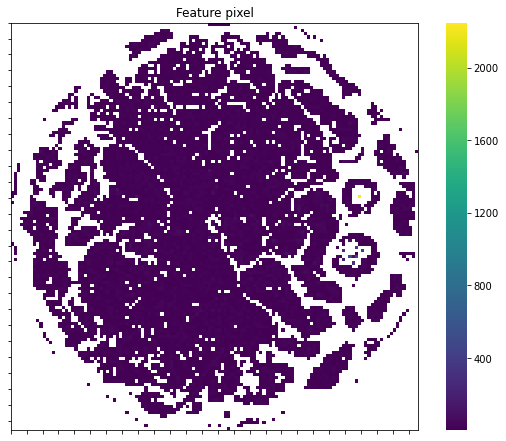

In [184]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

fdm = it.feature_density_matrix()
fdm[fdm == 0] = np.nan

plt.figure(figsize=(10, 7.5))

ax = sns.heatmap(fdm, cmap="viridis", linewidths=0., 
                 linecolor="lightgrey", square=True)
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.yaxis.set_major_locator(ticker.MultipleLocator(5))
for _, spine in ax.spines.items():
    spine.set_visible(True)
_ = plt.title("Feature pixel")

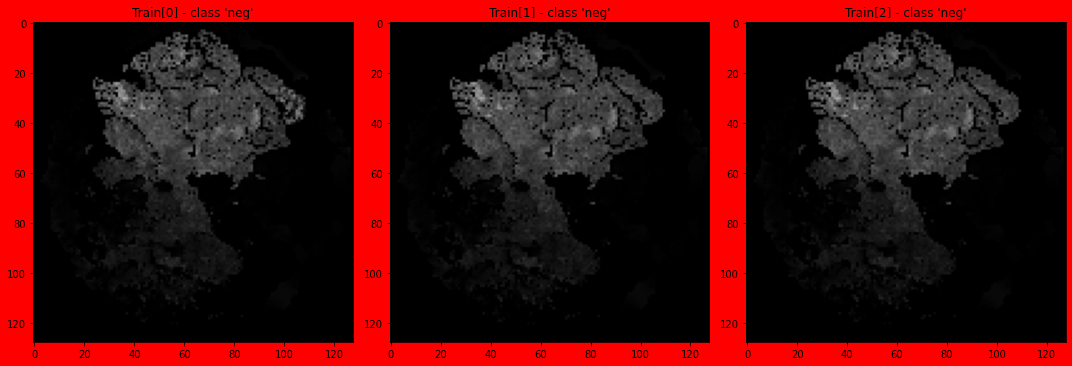

In [185]:

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for i in range(0,3):
    ax[i].imshow(X_train_img[i],cmap="viridis")
    fig.set_facecolor("red")
    ax[i].title.set_text(f"Train[{i}] - class '{y_train[i]}'")
plt.tight_layout()

In [186]:
import torch
import torchvision.transforms as transforms
from torch.utils.data import TensorDataset, DataLoader
import torch.nn as nn
import torch.optim as optim

from sklearn.metrics import accuracy_score

import warnings; 
warnings.simplefilter('ignore')

In [187]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [188]:
net = torch.hub.load(
    'pytorch/vision:v0.10.0', 'squeezenet1_1', 
    pretrained=True, verbose=False)
net.classifier[1] = nn.Conv2d(512, num_classes, kernel_size=(1,1), 
                              stride=(1,1))
net = net.to(device)

In [189]:
preprocess = transforms.Compose([
    transforms.ToTensor()
])

In [190]:
X_train_tensor = torch.stack([preprocess(img) for img in X_train_img]).float().to(device)
y_train_tensor = torch.from_numpy(le.fit_transform(y_train)).to(device)

X_test_tensor = torch.stack([preprocess(img) for img in X_test_img]).float().to(device)
y_test_tensor = torch.from_numpy(le.transform(y_test)).to(device)

In [191]:
batch_size = 100

trainset = TensorDataset(X_train_tensor, y_train_tensor)
trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True)

testset = TensorDataset(X_test_tensor, y_test_tensor)
testloader = DataLoader(testset, batch_size=batch_size, shuffle=False)

In [192]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(
    net.parameters(),
    lr=1e-04,
    momentum=0.8,
    weight_decay=1e-05
)

In [193]:
for epoch in range(200):

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        labels = labels.type(torch.LongTensor)   # casting to long
        
        labels = labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    # print epoch statistics
    if not (epoch % 20):
        print(f'[{epoch}] loss: {running_loss / len(X_train_tensor) * batch_size:.3f}')
print(f'[{epoch}] loss: {running_loss / len(X_train_tensor) * batch_size:.3f}')

[0] loss: 0.918
[20] loss: 0.698
[40] loss: 0.704
[60] loss: 0.707
[80] loss: 0.706
[100] loss: 0.703
[120] loss: 0.704
[140] loss: 0.705
[160] loss: 0.701
[180] loss: 0.698
[199] loss: 0.698


In [194]:
train_predicted = np.empty(0)
train_true = np.empty(0)
with torch.no_grad():
    net.eval()
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        pred = torch.max(net(inputs),1)[1].cpu().detach().numpy()
        train_predicted = np.append(train_predicted, pred)
        train_true = np.append(train_true, labels.cpu().detach().numpy())

In [195]:
test_predicted = np.empty(0)
test_true = np.empty(0)
with torch.no_grad():
    net.eval()
    for i, data in enumerate(testloader, 0):
        inputs, labels = data
        pred = torch.max(net(inputs),1)[1].cpu().detach().numpy()
        test_predicted = np.append(test_predicted, pred)
        test_true = np.append(test_true, labels.cpu().detach().numpy())


In [196]:
print(f"The train accuracy was {accuracy_score(train_predicted, train_true):.3f}")
print(f"The test accuracy was {accuracy_score(test_predicted, test_true):.3f}")

The train accuracy was 0.600
The test accuracy was 0.599


In [197]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_true, test_predicted)
cm

array([[115,   0],
       [ 77,   0]], dtype=int64)

<AxesSubplot:>

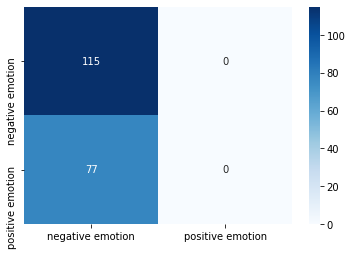

In [198]:
import seaborn as sns

cm_df = pd.DataFrame(cm, index=['negative emotion' , 'positive emotion'], columns=['negative emotion' , 'positive emotion'])
sns.heatmap(cm_df, annot=True, 
            fmt='', cmap='Blues')


In [199]:
accuracy=accuracy_score(y_true=test_true, y_pred=test_predicted)
print("Logistic-Accuracy: {:.2f}%".format(accuracy*100))
from sklearn.metrics import classification_report
print(classification_report(test_true,test_predicted))
print()

Logistic-Accuracy: 59.90%
              precision    recall  f1-score   support

         0.0       0.60      1.00      0.75       115
         1.0       0.00      0.00      0.00        77

    accuracy                           0.60       192
   macro avg       0.30      0.50      0.37       192
weighted avg       0.36      0.60      0.45       192




In [200]:
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#The diagonal entries are the accuracies of each class
cm.diagonal()*100

array([100.,   0.])

Text(0.5, 1.0, 'accuracy of each class')

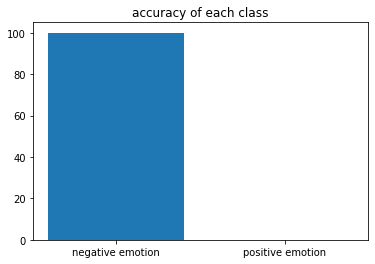

In [201]:
plt.bar(['negative emotion' , 'positive emotion'],cm.diagonal()*100)
plt.xticks(rotation=0)
plt.title("accuracy of each class")